## Demo

In [91]:
%reload_ext autoreload
%autoreload 2
from wavescapes import Wavescape, complex_utm_to_ws_utm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from glob import glob
import os
import networkx as nx
import seaborn as sns
from networkx.algorithms.components import number_connected_components, connected_components
from sklearn.preprocessing import MinMaxScaler, StandardScaler


from etl import get_pcvs, apply_dft_to_all
from utils import most_resonant, custom_utm_to_ws_utm, circular_hue_revised, pitch_class_matrix_to_tritone, pitch_class_matrix_to_minor_major, MOZART_PROFILES, center_of_mass


In [63]:
pcvs = get_pcvs('./pcvs')
dfts = apply_dft_to_all(pcvs)
metadata = pd.read_csv('metadata.tsv', sep='\t', index_col=1)
fname2year = (metadata.composed_end + metadata.composed_start) / 2
print(f"Metadata for {fname2year.shape[0]} files.")
fname2year.head(10)

Metadata for 58 files.


fnames
MIDIl087-03_images_quelques       NaN
l000_etude                     1915.0
l000_soirs                     1917.0
l009_danse                     1880.0
l066-01_arabesques-premiere    1888.0
l067_mazurka                   1890.0
l068_reverie                   1890.0
l069_tarentelle                1890.0
l070_ballade                   1890.0
l071_valse                     1890.0
dtype: float64

In [64]:
metadata.head(5)

rel_paths  last_mc  last_mn  \
fnames                                                    
MIDIl087-03_images_quelques       MS3      186      186   
l000_etude                        MS3       73       71   
l000_soirs                        MS3       23       23   
l009_danse                        MS3       92       92   
l066-01_arabesques-premiere       MS3      107      107   

                                                                        KeySig  \
fnames                                                                           
MIDIl087-03_images_quelques                                              1: -1   
l000_etude                   1: -4, 7: 0, 9: -5, 38: 0, 42: -4, 48: -3, 57:...   
l000_soirs                                                               1: -4   
l009_danse                                                  1: 2, 45: 5, 61: 2   
l066-01_arabesques-premiere                                 1: 4, 39: 3, 71: 4   

                                                       TimeSig  label_count  \
fnames                                                                        
MIDIl087-03_images_quelques  1: 4/4, 74: 6/4, 90: 3/4, 91: 6/8            0   
l000_etude                                              1: 4/4            0   
l000_soirs                                              1: 4/4            0   
l009_danse                                              1: 2/4            0   
l066-01_arabesques-premiere           1: 4/4, 94: 2/4, 95: 4/4            0   

                                   composer           workTitle  \
fnames                                                            
MIDIl087-03_images_quelques             NaN                 NaN   
l000_etude                   Claude Debussy      Etude Retrouve   
l000_soirs                              NaN                 NaN   
l009_danse                   Claude Debussy      Danse Bohemian   
l066-01_arabesques-premiere  Claude Debussy  Premiere Arabesque   

                            movementNumber movementTitle  ... originalFormat  \
fnames                                                    ...                  
MIDIl087-03_images_quelques            NaN           NaN  ...            mid   
l000_etude                             NaN           NaN  ...            NaN   
l000_soirs                             NaN           NaN  ...            NaN   
l009_danse                             NaN           NaN  ...            NaN   
l066-01_arabesques-premiere            NaN           NaN  ...            NaN   

                                                                           pdf  \
fnames                                                                           
MIDIl087-03_images_quelques                                                NaN   
l000_etude                                                                 NaN   
l000_soirs                                                                 NaN   
l009_danse                                                                 NaN   
l066-01_arabesques-premiere  https://imslp.org/wiki/Special:ReverseLookup/2821   

                             staff_1_ambitus staff_1_instrument  \
fnames                                                            
MIDIl087-03_images_quelques  37-100 (C#2-E7)              Piano   
l000_etude                    32-96 (Ab1-C7)              Piano   
l000_soirs                    54-89 (Gb3-F6)              Piano   
l009_danse                   49-94 (C#3-A#6)              Piano   
l066-01_arabesques-premiere   50-92 (D3-G#6)              Piano   

                            staff_2_ambitus staff_2_instrument  \
fnames                                                           
MIDIl087-03_images_quelques  21-94 (A0-A#6)              Piano   
l000_etude                   25-91 (Db1-G6)              Piano   
l000_soirs                    50-77 (D3-F5)              Piano   
l009_danse                    35-71 (B1-B4)              Piano   
l066-01_arabe

In [66]:
piece = 'l009_danse'
utm_max, utm_entropy, utm_argmax = most_resonant(dfts[piece])
utm_max.shape

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


(182, 182)

In [67]:
utm_sum = custom_utm_to_ws_utm(utm_entropy, utm_argmax, dfts[piece], 'entropy')

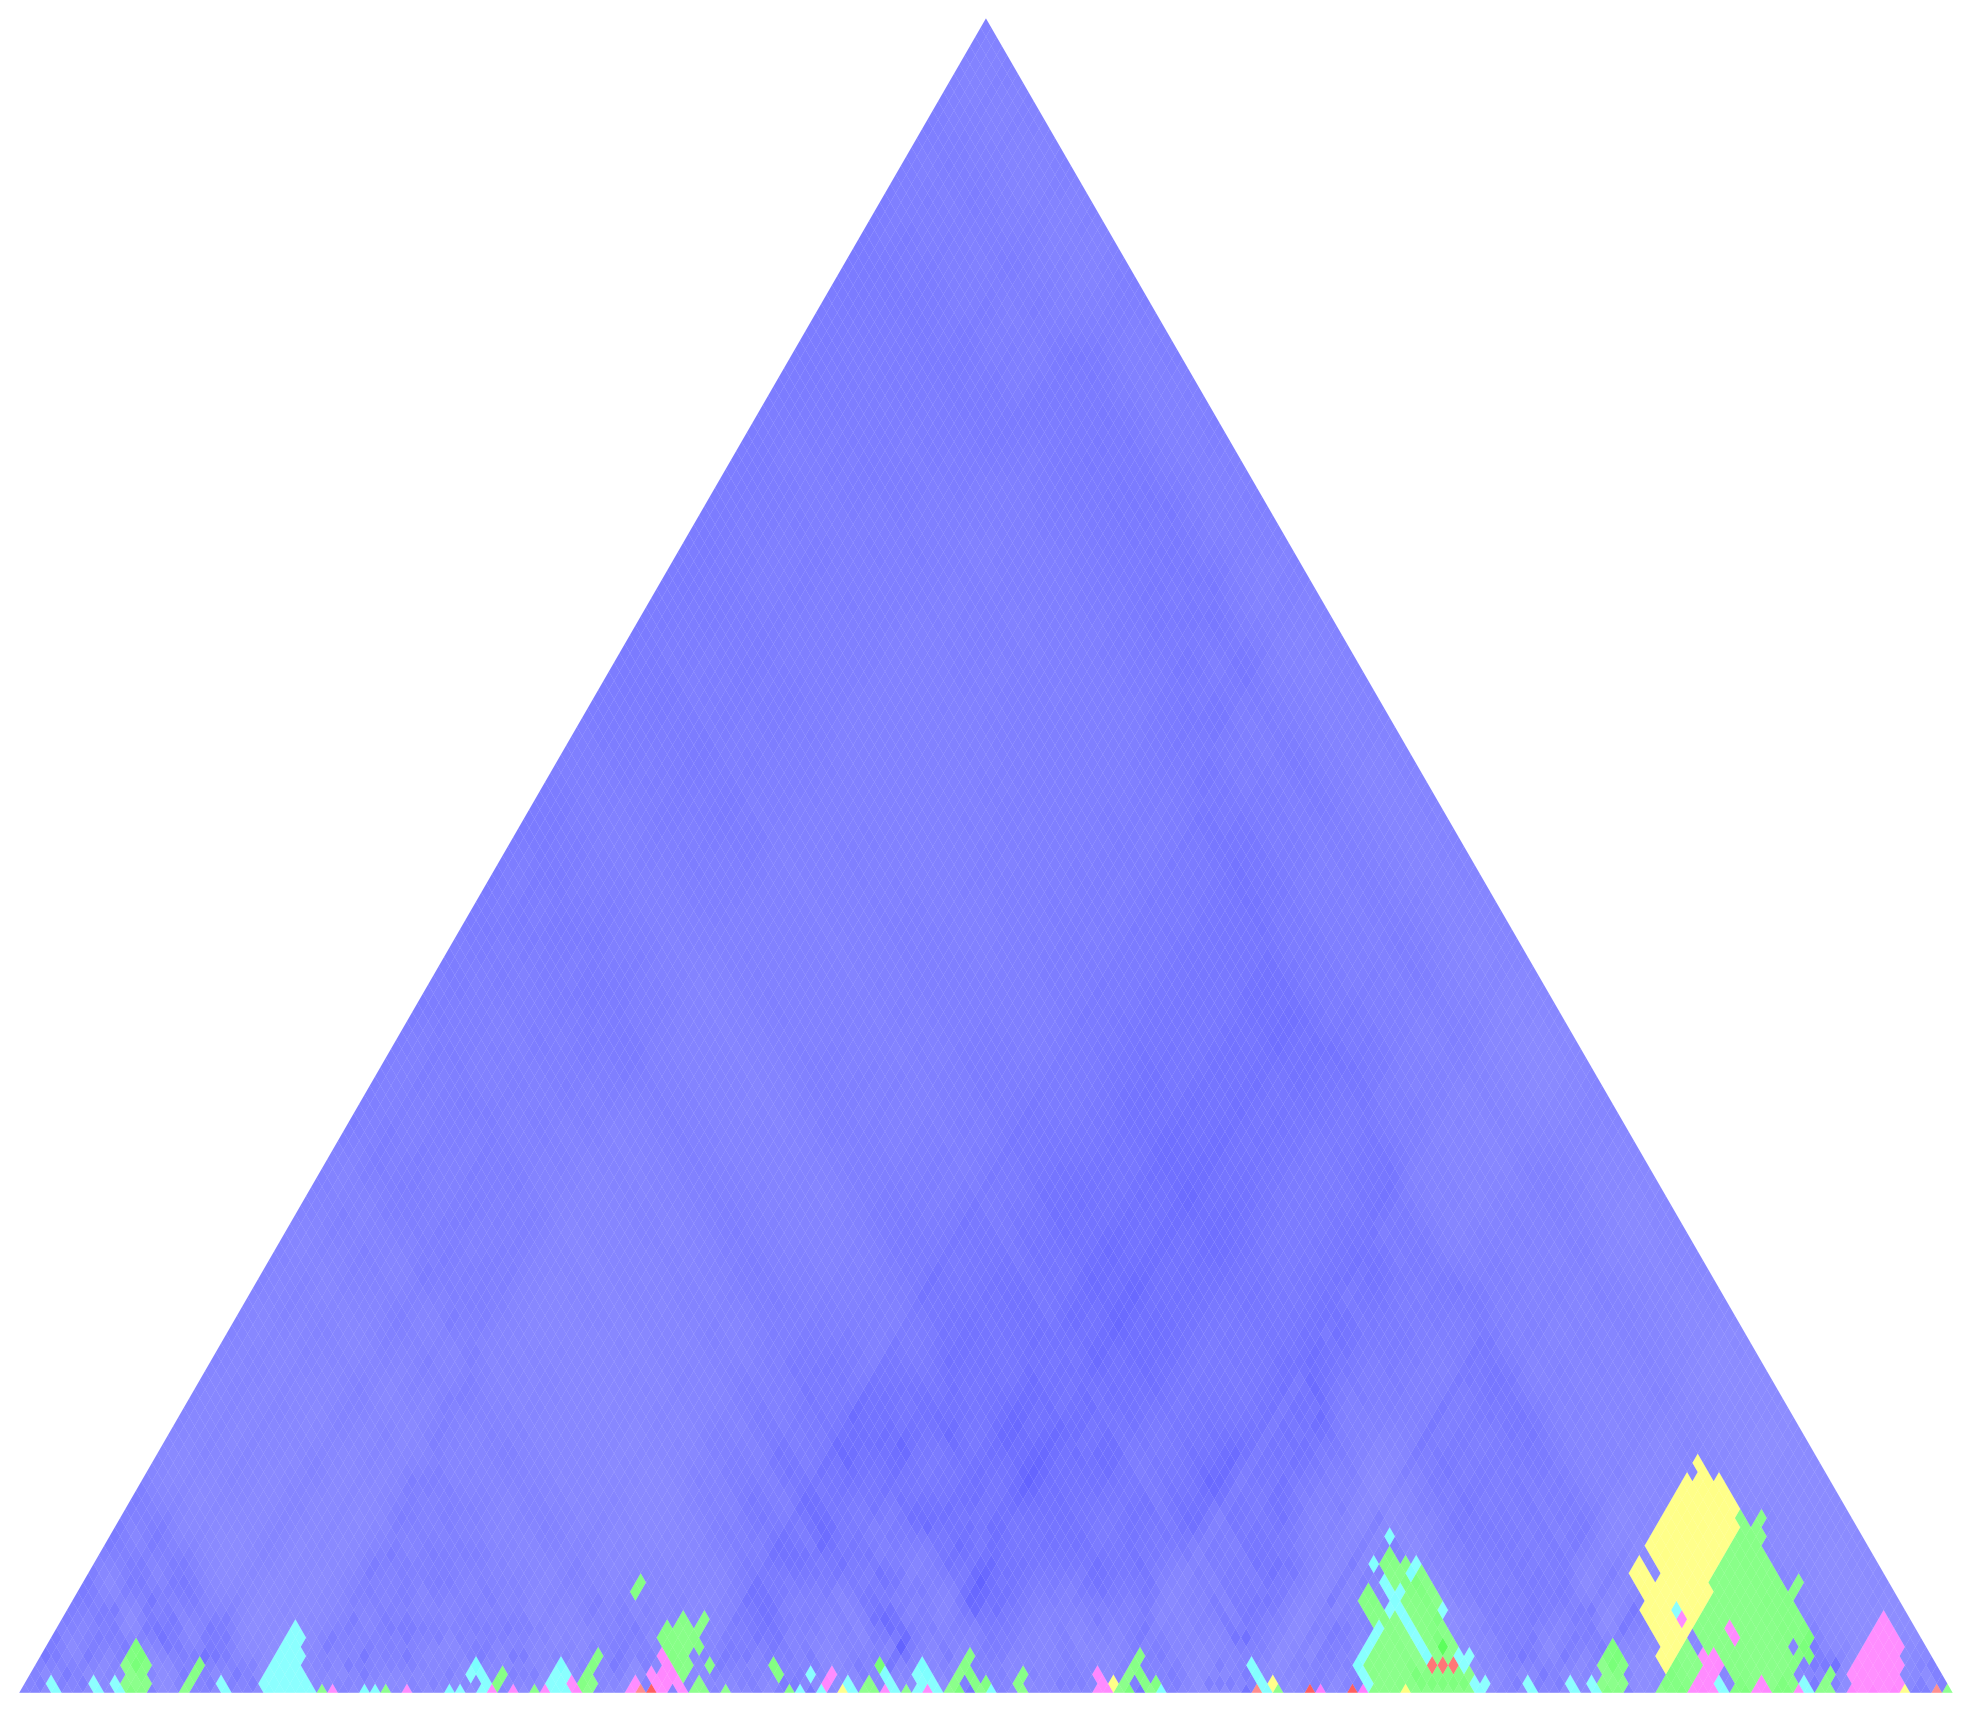

In [68]:
patches = []
for i in range(6):
    patches.append(mpatches.Patch(color=np.array(circular_hue_revised(i))[:3]/255, label='Coefficient '+str(i+1)))

Wavescape(utm_sum, 1000).draw()

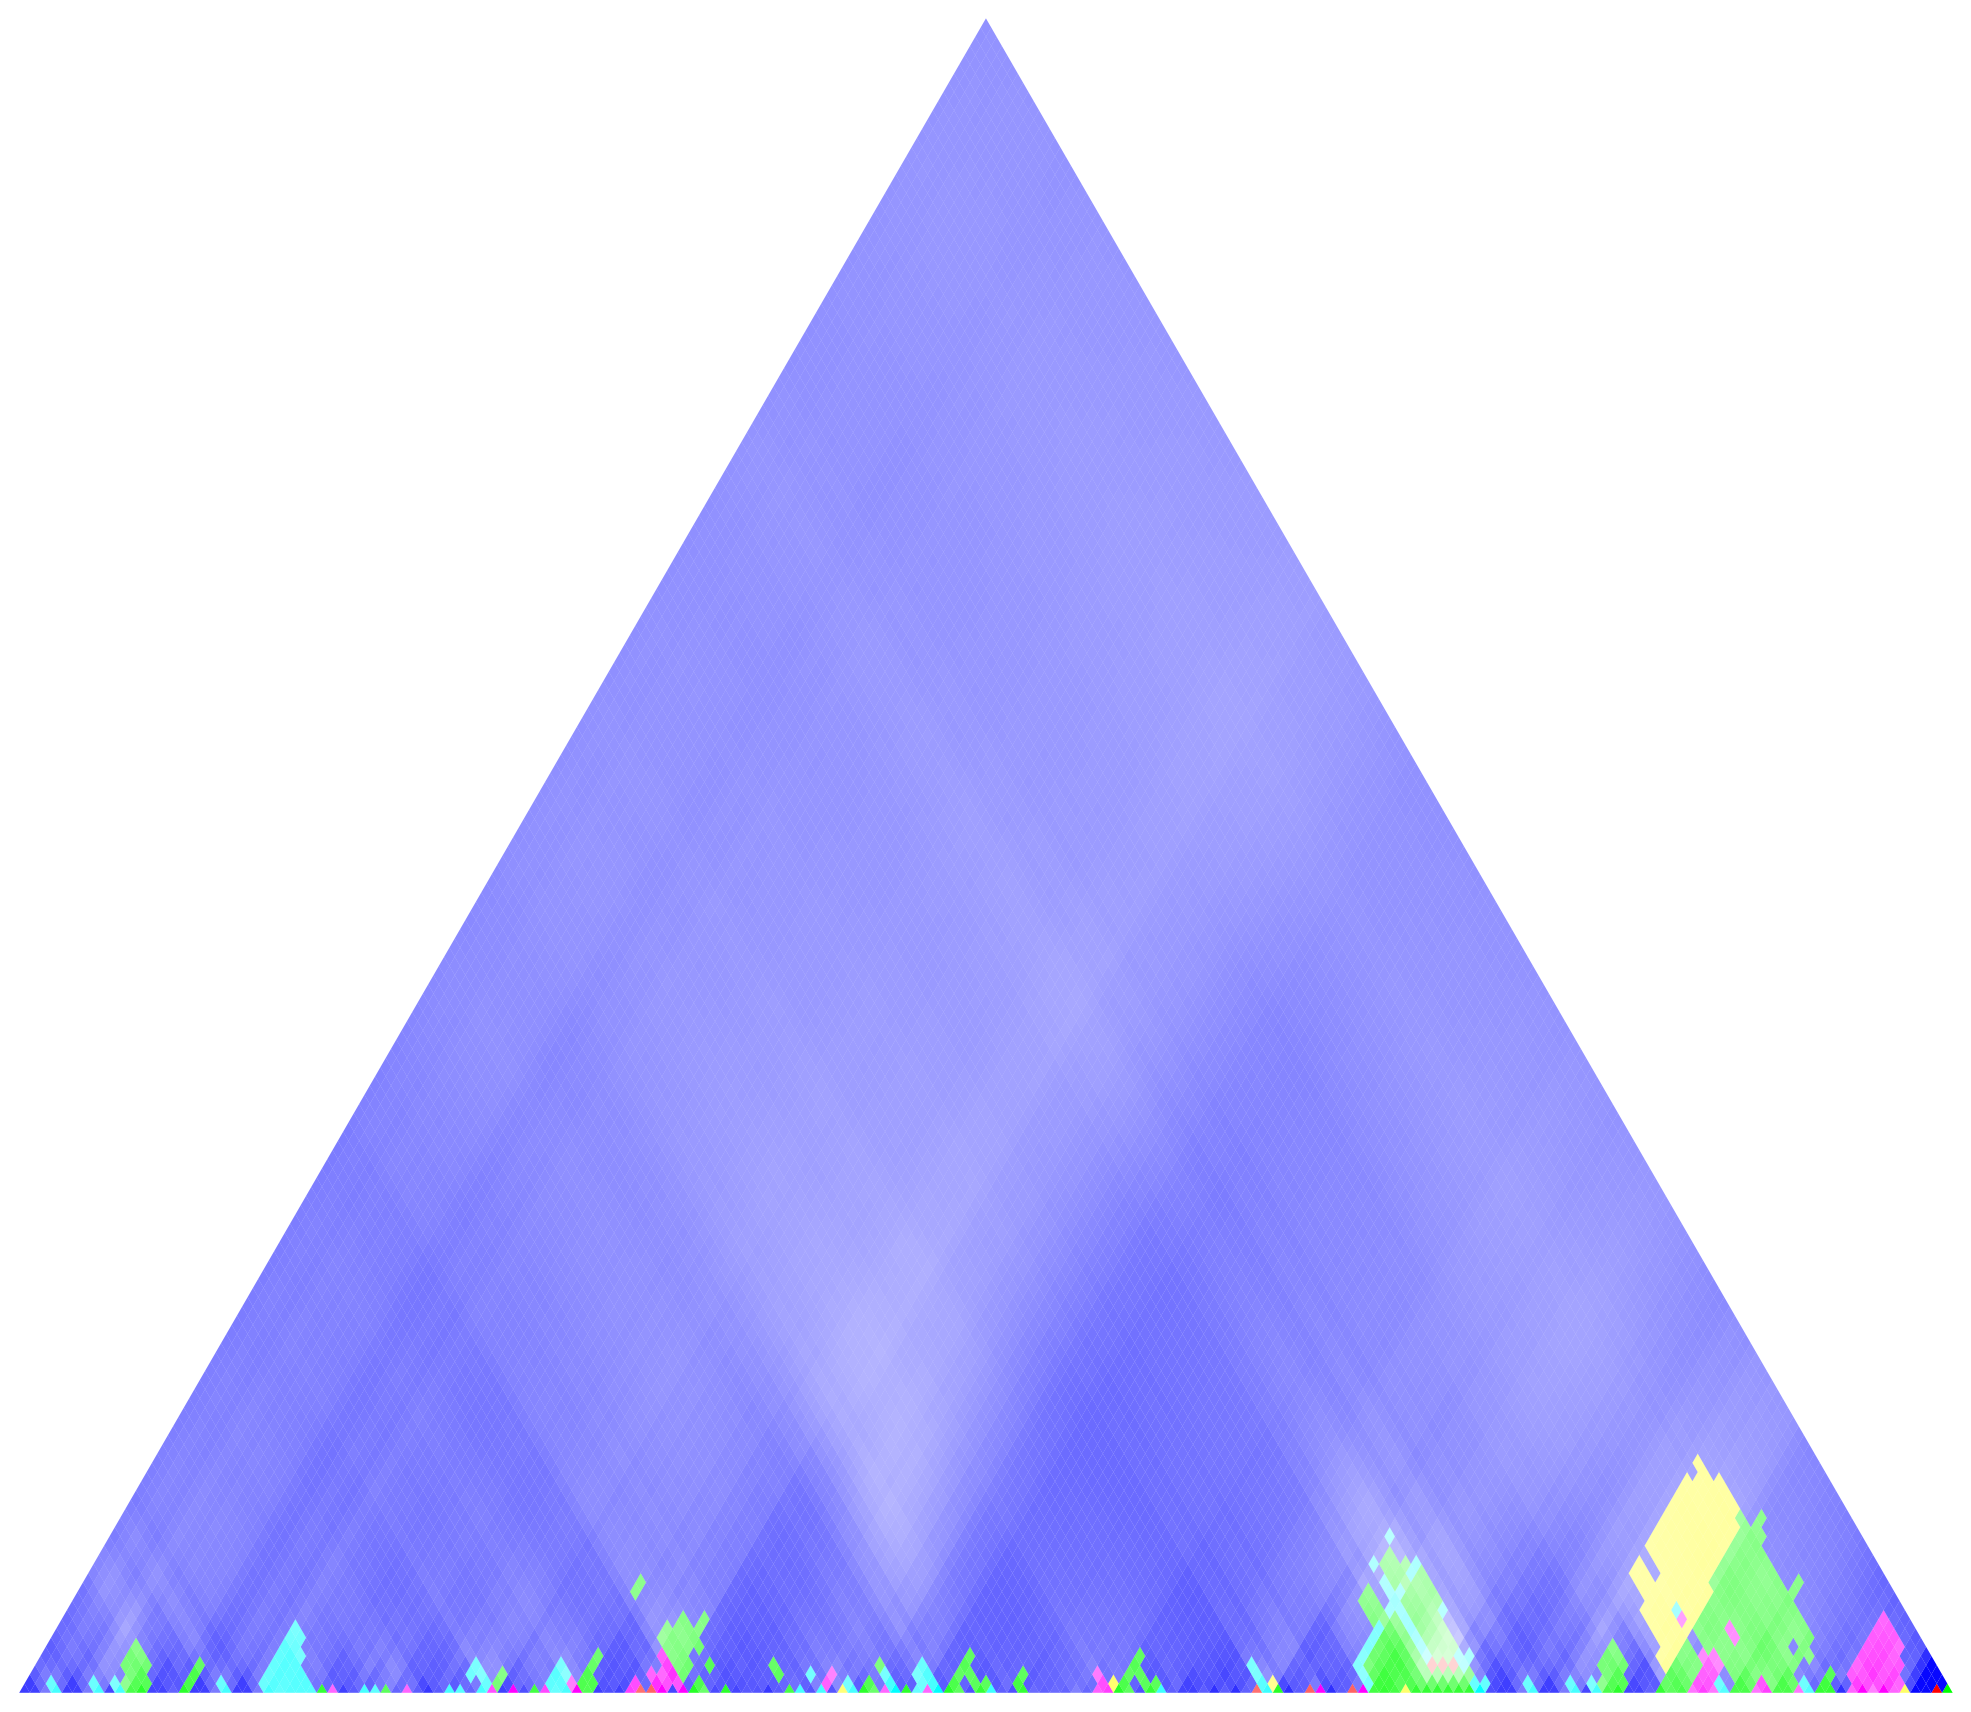

In [69]:
utm_sum = custom_utm_to_ws_utm(utm_max, utm_argmax, dfts[piece], 'max')
Wavescape(utm_sum, 1000).draw()

## Fragmentation analysis

In [70]:
for i in range(1,7):
    x, y = center_of_mass(i, dfts[piece])
    print('Coefficient: ', i)
    print(x, y)


Coefficient:  1
0.6111076720911434 0.26859444309595387
Coefficient:  2
0.646480844795229 0.30033549443296464
Coefficient:  3
0.6439675197737386 0.28933912428009595
Coefficient:  4
0.6351123408634479 0.2707416054477126
Coefficient:  5
0.6472219704719678 0.3144253196374385
Coefficient:  6
0.6395881844644834 0.19883490173690083


0.6472219704719678 0.3144253196374385


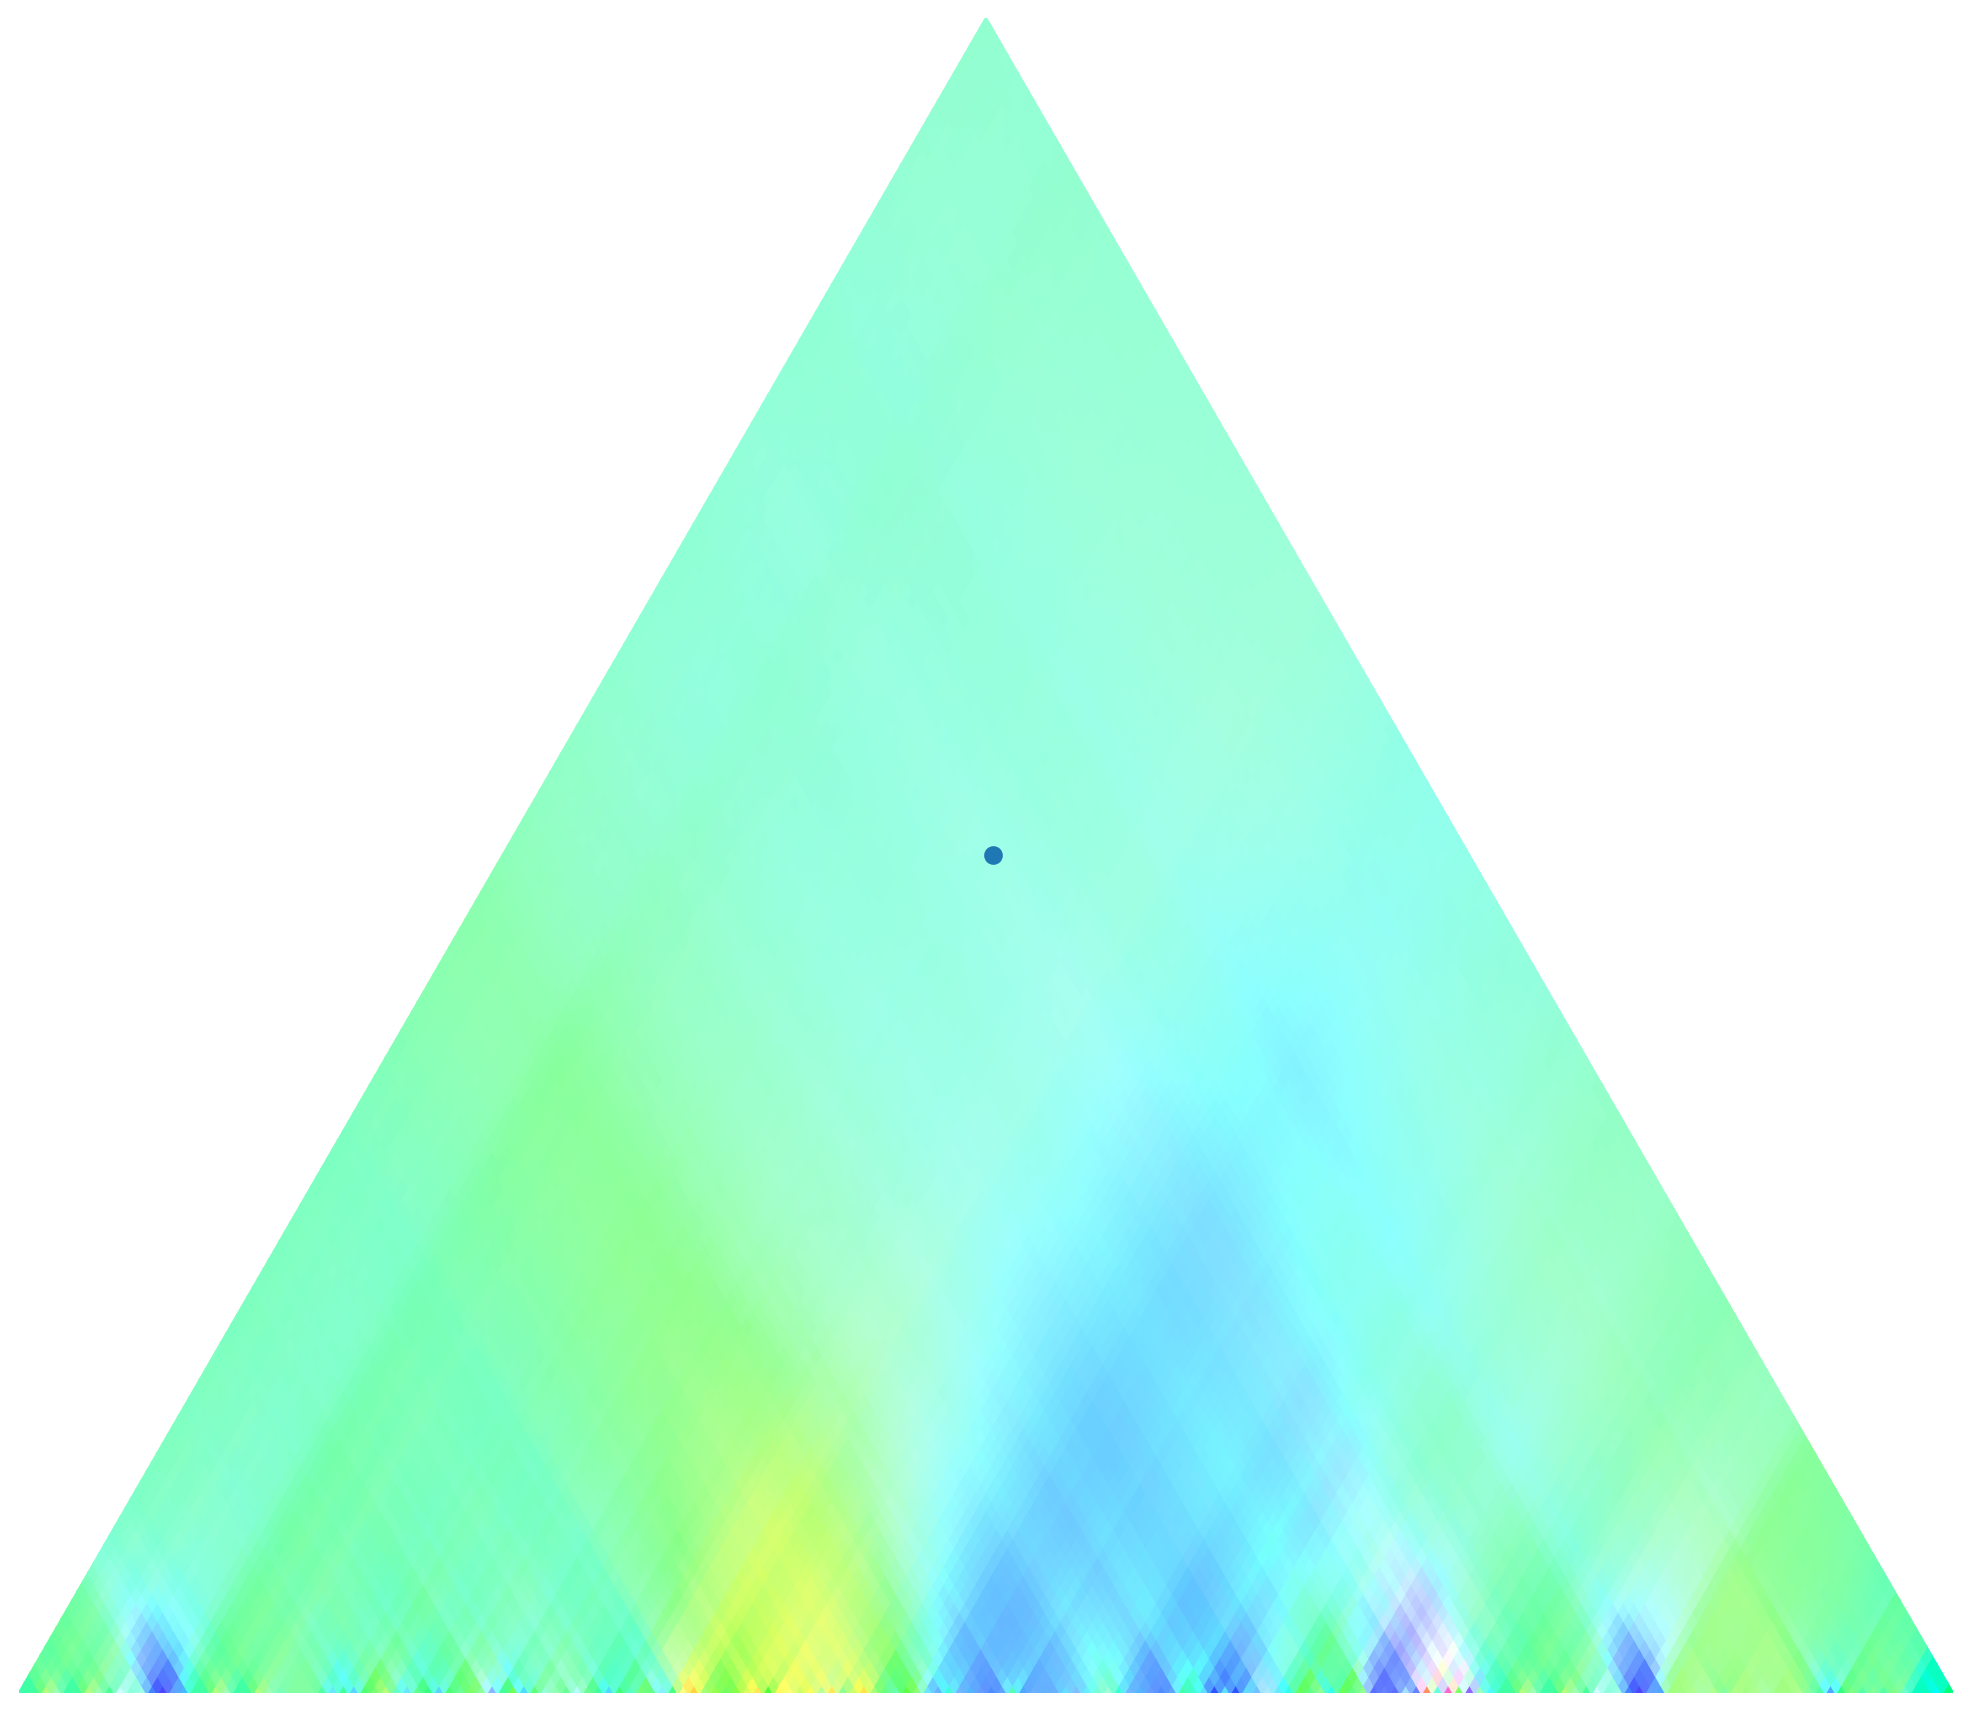

In [71]:
coeff_5 = complex_utm_to_ws_utm(dfts[piece], coeff=5)
x, y = center_of_mass(5, dfts[piece])
Wavescape(coeff_5, 1000).draw()
plt.plot(x, y, marker="o")
print(x, y)

In [72]:
vcoms = []
for it in metadata.iterrows():
    print(it[0])
    try:
        vcom = [center_of_mass(i, dfts[it[0]]) for i in range(1,7)]
        vcoms.append(vcom)
    except Exception as e:
        vcoms.append([np.nan]*6)
        print(e)

MIDIl087-03_images_quelques
'MIDIl087-03_images_quelques'
l000_etude
l000_soirs
l009_danse
l066-01_arabesques-premiere
'l066-01_arabesques-premiere'
l067_mazurka
l068_reverie
l069_tarentelle
l070_ballade
l071_valse
l082_nocturne
l087-01_images_lent
l095-01_pour_prelude
l095-02_pour_sarabande
l095-03_pour_toccata
l100-01_estampes_pagode
index 6 is out of bounds for axis 2 with size 6
l100-02_estampes_soiree
l100-03_estampes_jardins
l106_isle
l110-01_images_reflets
l110-02_images_hommage
l110-03_images_mouvement
l111-02_images_lune
l113-01_childrens_doctor
l113-02_childrens_jimbos
l113-03_childrens_serenade
l113-05_childrens_golliwoggs
l113-05_childrens_little
l114_petit
l115_hommage
l117-02_preludes_voiles
index 5 is out of bounds for axis 2 with size 5
l117-03_preludes_vent
l117-04_preludes_sons
l117-05_preludes_collines
l117-06_preludes_pas
l117-07_preludes_ce
l117-08_preludes_fille
index 6 is out of bounds for axis 2 with size 6
l117-09_preludes_serenade
l117-10_preludes_cathedrale
l

In [73]:
for i in range(1,7):
    metadata[f"center_of_mass_{i}"] = [vcom[i-1][1] if type(vcom[i-1]) != float else np.nan for vcom in vcoms]

In [74]:
metadata.head()

rel_paths  last_mc  last_mn  \
fnames                                                    
MIDIl087-03_images_quelques       MS3      186      186   
l000_etude                        MS3       73       71   
l000_soirs                        MS3       23       23   
l009_danse                        MS3       92       92   
l066-01_arabesques-premiere       MS3      107      107   

                                                                        KeySig  \
fnames                                                                           
MIDIl087-03_images_quelques                                              1: -1   
l000_etude                   1: -4, 7: 0, 9: -5, 38: 0, 42: -4, 48: -3, 57:...   
l000_soirs                                                               1: -4   
l009_danse                                                  1: 2, 45: 5, 61: 2   
l066-01_arabesques-premiere                                 1: 4, 39: 3, 71: 4   

                                                       TimeSig  label_count  \
fnames                                                                        
MIDIl087-03_images_quelques  1: 4/4, 74: 6/4, 90: 3/4, 91: 6/8            0   
l000_etude                                              1: 4/4            0   
l000_soirs                                              1: 4/4            0   
l009_danse                                              1: 2/4            0   
l066-01_arabesques-premiere           1: 4/4, 94: 2/4, 95: 4/4            0   

                                   composer           workTitle  \
fnames                                                            
MIDIl087-03_images_quelques             NaN                 NaN   
l000_etude                   Claude Debussy      Etude Retrouve   
l000_soirs                              NaN                 NaN   
l009_danse                   Claude Debussy      Danse Bohemian   
l066-01_arabesques-premiere  Claude Debussy  Premiere Arabesque   

                            movementNumber movementTitle  ...  \
fnames                                                    ...   
MIDIl087-03_images_quelques            NaN           NaN  ...   
l000_etude                             NaN           NaN  ...   
l000_soirs                             NaN           NaN  ...   
l009_danse                             NaN           NaN  ...   
l066-01_arabesques-premiere            NaN           NaN  ...   

                             staff_3_ambitus  staff_3_instrument transcriber  \
fnames                                                                         
MIDIl087-03_images_quelques              NaN                 NaN         NaN   
l000_etude                               NaN                 NaN         NaN   
l000_soirs                   32-39 (Ab1-Eb2)               Piano         NaN   
l009_danse                               NaN                 NaN         NaN   
l066-01_arabesques-premiere              NaN                 NaN         NaN   

                                                      typesetter  \
fnames                                                             
MIDIl087-03_images_quelques                                  NaN   
l000_etude                   https://musescore.com/user/33144689   
l000_soirs                         https://musescore.com/sansenk   
l009_danse                     https://musescore.com/yazen23434/   
l066-01_arabesques-premiere        https://musescore.com/hmscomp   

                            center_of_mass_1 center_of_mass_2  \
fnames                                                          
MIDIl087-03_images_quelques              NaN              NaN   
l000_etude                          0.265803         0.212363   
l000_soirs                          0.272347         0.302324   
l009_danse                          0.268594         0.300335   
l066-01_arabesques-premiere              NaN              NaN   

                             center_of_mass_3 center_of_mass_4  \

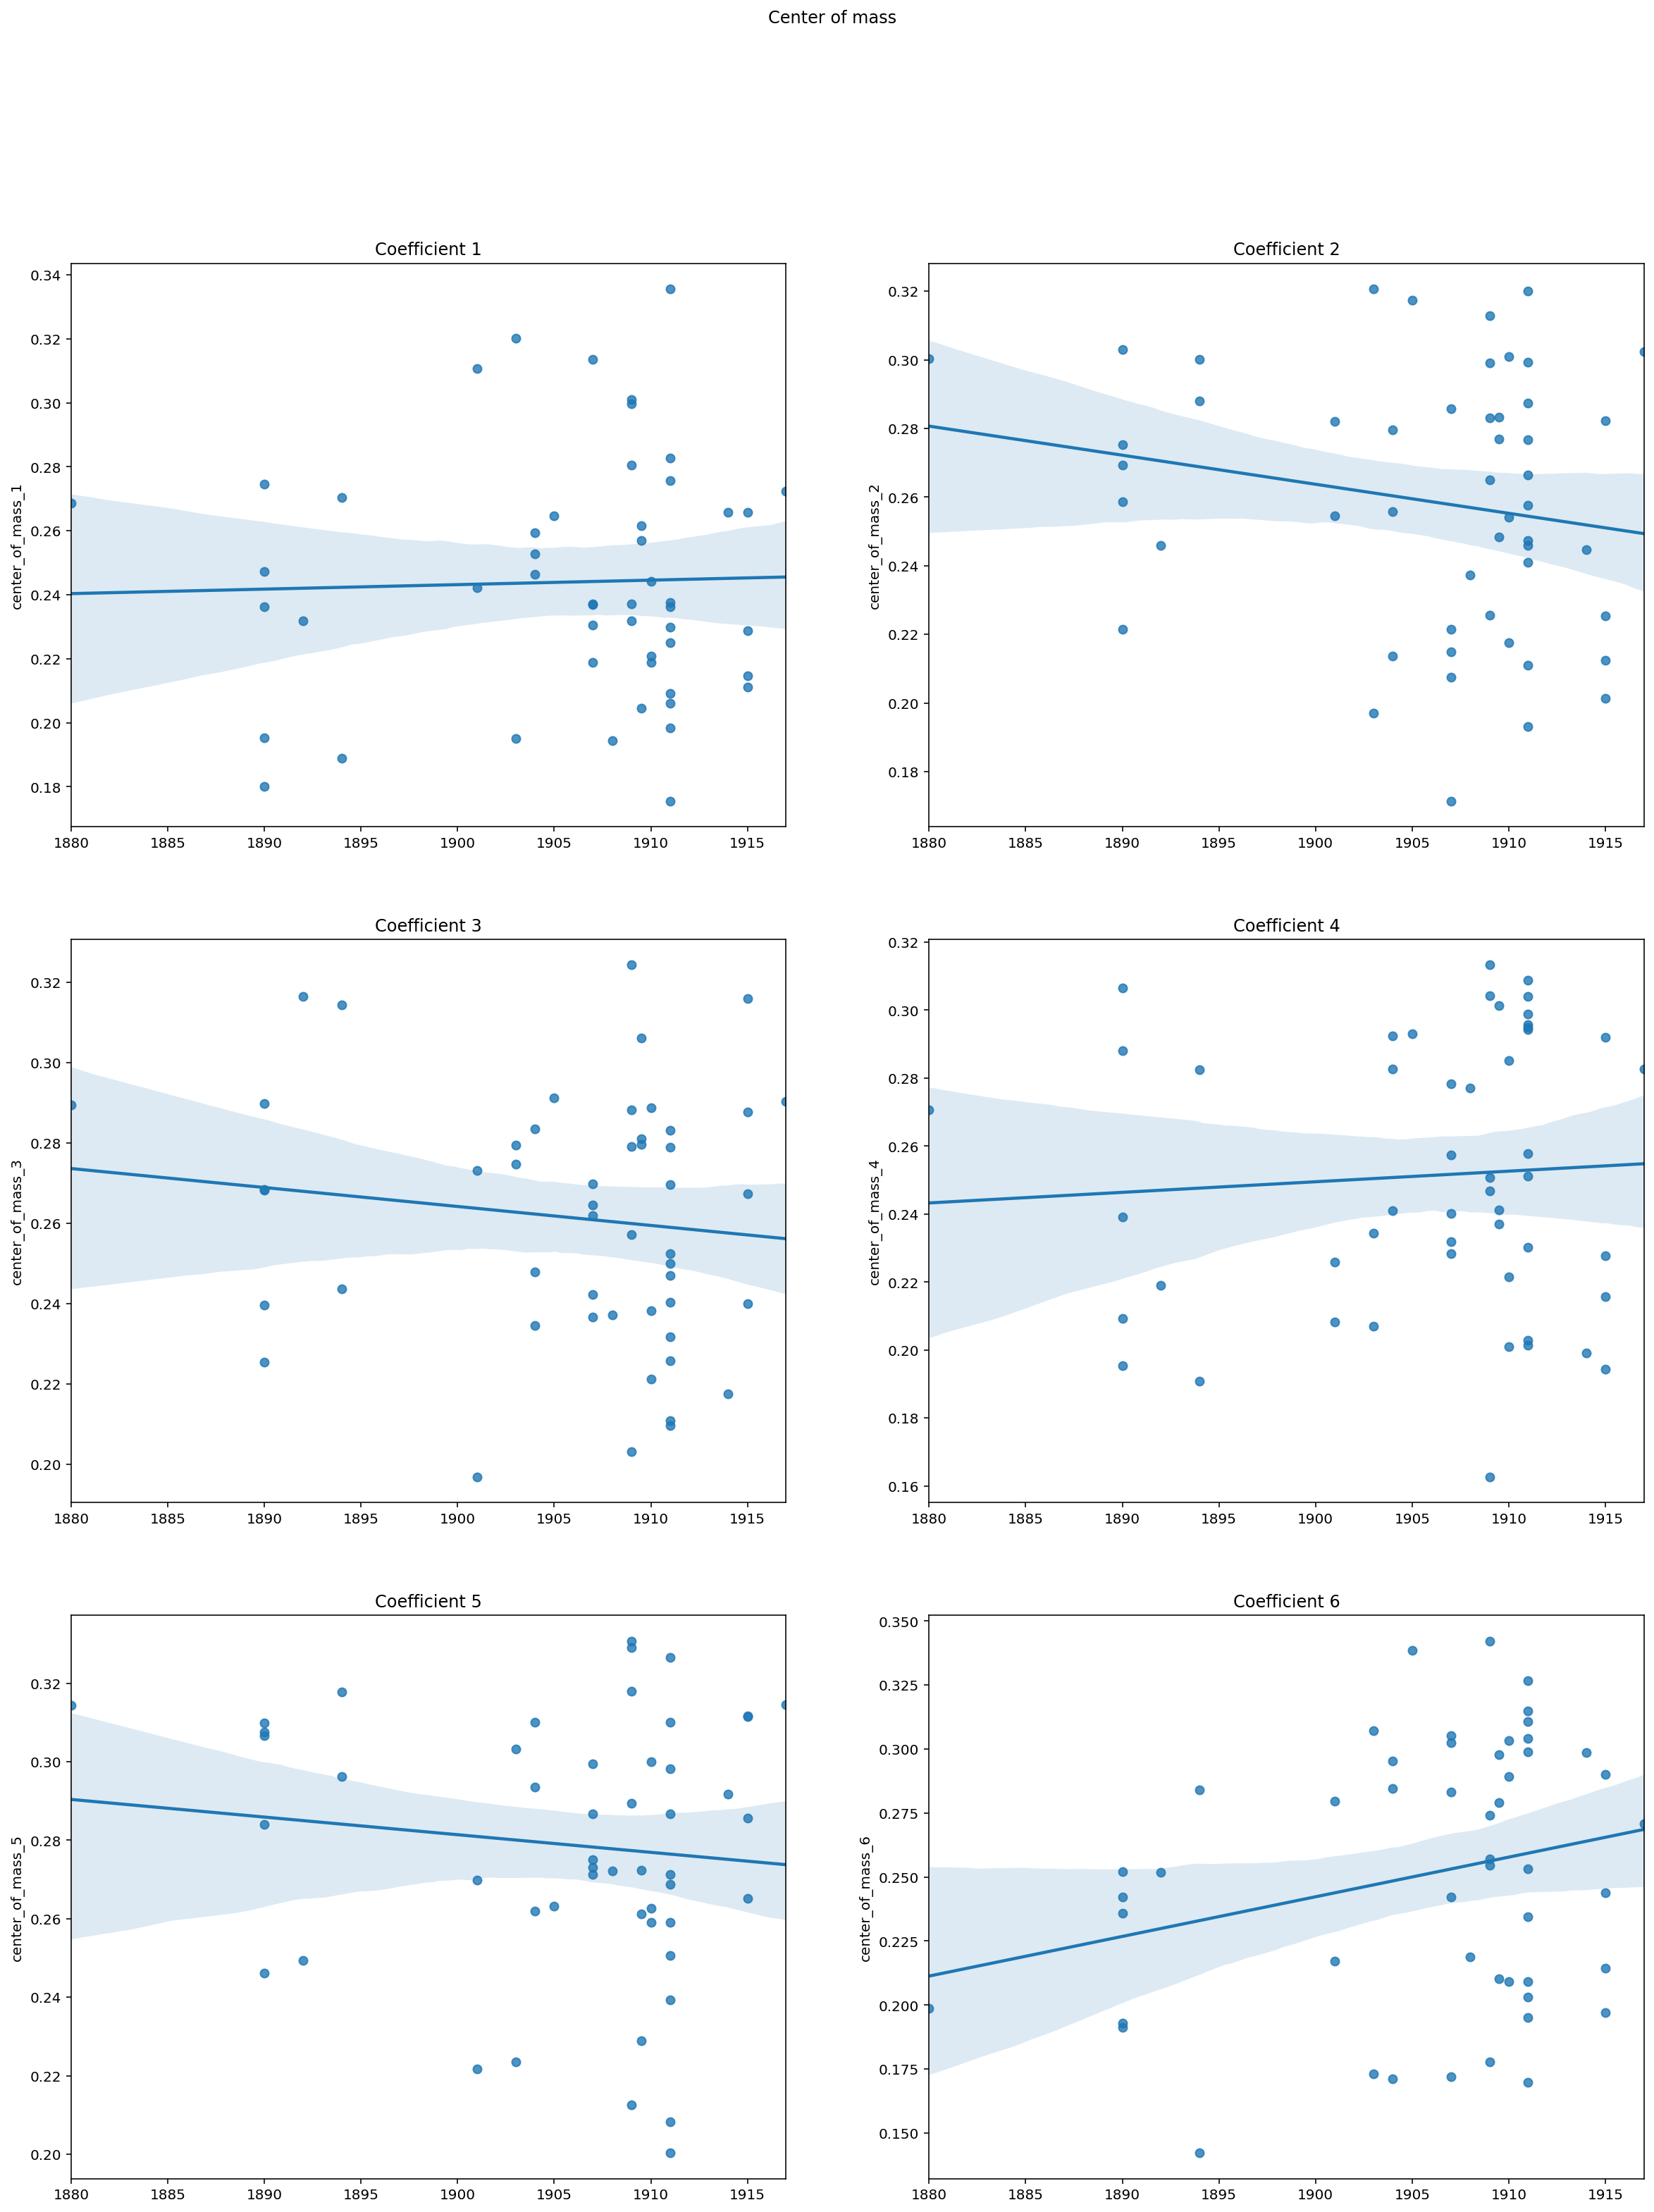

In [99]:
fig, axs = plt.subplots(3,2, figsize=(20,25))
axs = axs.flatten()

fig.suptitle('Center of mass')
columns_com = []

for i in range(1,7):
    axs[i-1].set_title(f"Coefficient {i}")
    columns_com.append(f"center_of_mass_{i}")
    sns.regplot(x=fname2year, y=f"center_of_mass_{i}", data=metadata, ax=axs[i-1])
    #axs[i-1].scatter(fname2year, metadata[])

plt.savefig('figures/center_of_mass.png')

In [101]:
metadata['year_between'] = fname2year

metadata_sm = metadata[metadata['center_of_mass_1'].notnull()]

In [105]:
import statsmodels.api as sm
scaler = Standard()
com = pd.DataFrame(scaler.fit_transform(metadata_sm[columns_com]), columns=columns_com)

results = sm.OLS(metadata_sm['year_between'], com).fit()


NameError: name 'Standard' is not defined

In [103]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           year_between   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1708.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                    2.33e-51
Time:                        15:38:27   Log-Likelihood:                         -319.01
No. Observations:                  51   AIC:                                      650.0
Df Residuals:                      45   BIC:                                      661.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

## Number of connected regions

In [76]:

def add(adj_list, a, b):
    adj_list.setdefault(a, []).append(b)
    adj_list.setdefault(b, []).append(a)

adj_list = {}
        
utm_index = np.arange(0, utm_argmax.shape[0]*utm_argmax.shape[1]).reshape(utm_argmax.shape[0], utm_argmax.shape[1])
for i in range(len(utm_argmax)):
    for j in range(len(utm_argmax[i])):
        if (j < len(utm_argmax[i]) - 1) and (utm_argmax[i][j] == utm_argmax[i][j+1]):
            add(adj_list, utm_index[i][j], utm_index[i][j+1])
        if i < len(utm_argmax[i]) - 1:
            for x in range(max(0, j - 1), min(len(utm_argmax[i+1]), j+2)):
                if (utm_argmax[i][j] == utm_argmax[i+1][x]):
                    add(adj_list, utm_index[i][j], utm_index[i+1][x])

import pprint
pprint.pprint(adj_list)


{0: [1, 183],
 1: [0, 2, 183, 184],
 2: [1, 183, 184],
 3: [185],
 4: [5, 186, 187],
 5: [4, 6, 186, 187, 188],
 6: [5, 187, 188],
 7: [189],
 8: [190],
 9: [191],
 10: [11, 192, 193],
 11: [10, 192, 193, 194],
 12: [13, 195],
 13: [12, 14, 195, 196],
 14: [13, 195, 196, 197],
 15: [198],
 16: [17, 197, 199],
 17: [16, 18, 199, 200],
 18: [17, 199, 200],
 19: [201],
 20: [21, 202, 203],
 21: [20, 22, 202, 203, 204],
 22: [21, 203, 204],
 23: [24, 205, 206],
 24: [23, 25, 205, 206, 207],
 25: [24, 26, 206, 207, 208],
 26: [25, 27, 207, 208, 209],
 27: [26, 208, 209],
 30: [31, 211, 212, 213],
 31: [30, 212, 213, 214],
 32: [33],
 33: [32],
 35: [216, 217, 218],
 37: [38, 218, 219, 220],
 38: [37, 39, 219, 220, 221],
 39: [38, 220, 221, 222],
 40: [41],
 41: [40],
 42: [223, 224, 225],
 43: [226],
 45: [228],
 47: [228, 229, 230],
 50: [51, 232, 233],
 51: [50, 232, 233],
 52: [234],
 53: [235, 236],
 54: [55, 237],
 55: [54, 56, 237, 238],
 56: [55, 237, 238, 239],
 57: [240],
 58: [59]

In [77]:
G = nx.Graph(adj_list)
print(number_connected_components(G))

56


In [78]:
components = connected_components(G)
# with this compute the entropy

In [79]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 33083
Number of edges: 129141
Average degree:   7.8071


## Summary plots

In [ ]:
#all_wavescapes(data['filepath'][1], individual_width=500, aw_size=4)

In [ ]:
if '.\\figures' not in glob('./*'):
    print('making folder')
    os.makedirs('figures')


In [44]:
  
for score in dfts.items():
    print(score[0])
    try:
        utm_max, utm_entropy, utm_argmax = most_resonant(score[1])
        utm_sum = custom_utm_to_ws_utm(utm_max, utm_argmax, score[1], 'max')
        Wavescape(utm_sum, 1000).draw()
        plt.suptitle(score[0] + '\n', fontsize=14)
        plt.legend(handles=patches)
        plt.savefig('./figures/' + str(score[0]) + '.png')
        plt.close()
        utm_sum = custom_utm_to_ws_utm(utm_entropy, utm_argmax, score[1], 'entropy')
        Wavescape(utm_sum, 1000).draw()
        plt.suptitle('entropy - ' + str(score[0]) + '\n', fontsize=14)
        plt.legend(handles=patches)
        plt.savefig('./figures/entropy_' + str(score[0]) + '.png')
        plt.close()
        
    except Exception as e:
        print(e)

l087-03_images_quelques


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


The number of elements to be drawn exceeds the wavescape's resolution.(679 elements out of 500 allowed by the resolution) Increase the width of the plot to solve this issue
l000_etude
l000_soirs
l009_danse
l066-01_arabesques
l067_mazurka
l068_reverie
l069_tarentelle
The number of elements to be drawn exceeds the wavescape's resolution.(995 elements out of 500 allowed by the resolution) Increase the width of the plot to solve this issue
l070_ballade
l071_valse
l082_nocturne
l087-01_images_lent
l095-01_pour_prelude
The number of elements to be drawn exceeds the wavescape's resolution.(535 elements out of 500 allowed by the resolution) Increase the width of the plot to solve this issue
l095-02_pour_sarabande
l095-03_pour_toccata
The number of elements to be drawn exceeds the wavescape's resolution.(530 elements out of 500 allowed by the resolution) Increase the width of the plot to solve this issue
l100-01_estampes_pagode
l100-02_estampes_soiree
l100-03_estampes_jardins
The number of elem

## Vector expansions with tritone, major, minor

In [83]:
# tritone detector
 
utm_tritone = pitch_class_matrix_to_tritone(pcvs[piece])
print(utm_tritone.shape)
#utm_tritone[0]

(182, 182, 1)


In [84]:
# major and minor detector

key_profiles = {
    'major': np.array(list(MOZART_PROFILES['major'].values())),
    'minor': np.array(list(MOZART_PROFILES['minor'].values()))
}
rotated_kp = {(mode, rotation): np.roll(kp, rotation) for mode, kp in key_profiles.items() for rotation in range(12)}
rotated_kp

{('major',
  0): array([0.200337  , 0.01081261, 0.1139921 , 0.01210411, 0.13638737,
        0.12263113, 0.01899352, 0.20490465, 0.01461186, 0.07414111,
        0.01135115, 0.07973339]),
 ('major',
  1): array([0.07973339, 0.200337  , 0.01081261, 0.1139921 , 0.01210411,
        0.13638737, 0.12263113, 0.01899352, 0.20490465, 0.01461186,
        0.07414111, 0.01135115]),
 ('major',
  2): array([0.01135115, 0.07973339, 0.200337  , 0.01081261, 0.1139921 ,
        0.01210411, 0.13638737, 0.12263113, 0.01899352, 0.20490465,
        0.01461186, 0.07414111]),
 ('major',
  3): array([0.07414111, 0.01135115, 0.07973339, 0.200337  , 0.01081261,
        0.1139921 , 0.01210411, 0.13638737, 0.12263113, 0.01899352,
        0.20490465, 0.01461186]),
 ('major',
  4): array([0.01461186, 0.07414111, 0.01135115, 0.07973339, 0.200337  ,
        0.01081261, 0.1139921 , 0.01210411, 0.13638737, 0.12263113,
        0.01899352, 0.20490465]),
 ('major',
  5): array([0.20490465, 0.01461186, 0.07414111, 0.01135115

In [86]:
utm_major_minor = pitch_class_matrix_to_minor_major(pcvs[piece], rotated_kp)
utm_major_minor.shape

(182, 182, 2)

In [93]:
utm_exp = np.concatenate((np.abs(dfts[piece][:,:,1:]), utm_tritone, utm_major_minor), axis=2)
utm_exp.shape

(182, 182, 9)

In [96]:

data_exp = pd.DataFrame(utm_exp.reshape(utm_exp.shape[0]*utm_exp.shape[0], 9))
data_exp = data_exp[data_exp[0] != 0]
data_exp.columns = ['Coeff 1', 'Coeff 2', 'Coeff 3', 'Coeff 4', 'Coeff 5', 'Coeff 6', 'Tritone', 'Major', 'Minor']
data_exp['fname'] = piece

#scaler = MinMaxScaler()
#data_exp = pd.DataFrame(scaler.fit_transform(data_exp), columns=data_exp.columns)

data_exp

Coeff 1   Coeff 2   Coeff 3   Coeff 4   Coeff 5   Coeff 6   Tritone  \
0      0.054468  0.567727  0.732933  0.506160  0.758647  0.272727  0.000000   
1      0.053590  0.529150  0.721110  0.529150  0.746410  0.200000  0.000000   
2      0.219082  0.250000  0.395285  0.500000  0.514299  0.250000  0.071429   
3      0.103528  0.346410  0.282843  0.721110  0.386370  0.600000  0.321429   
4      0.054468  0.567727  0.732933  0.506160  0.758647  0.272727  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
32758  0.046824  0.232354  0.233129  0.135537  0.424444  0.045377  0.010278   
32759  0.047911  0.230508  0.230159  0.138692  0.422680  0.049138  0.005139   
32940  0.045880  0.235295  0.237342  0.131933  0.427560  0.042409  0.010278   
32941  0.047785  0.232832  0.234061  0.135913  0.425422  0.047009  0.005139   
33123  0.046834  0.235771  0.238246  0.132360  0.428523  0.044030  0.005139   

          Major     Minor       fname  
0      0.654542  0.856749  l009_danse  
1      0.639548  0.853084  l009_danse  
2      0.717449  0.500061  l009_danse  
3      0.244167  0.414727  l009_danse  
4      0.654542  0.856749  l009_danse  
...         ...       ...         ...  
32758  0.615343  0.680074  l009_danse  
32759  0.570744  0.640537  l009_danse  
32940  0.615343  0.680074  l009_danse  
32941  0.570744  0.640537  l009_danse  
33123  0.570744  0.640537  l009_danse  

[16653 rows x 10 columns]

In [95]:
from scipy.stats import pearsonr

for col in data_exp.columns:
    for col2 in data_exp.columns:
        if col != col2:
            corr = pearsonr(data_exp[col], data_exp[col2])
            if abs(corr[0]) > 0.5:
                print(col, col2)
                print(pearsonr(data_exp[col], data_exp[col2]))

Coeff 1 Coeff 4
(0.6019690104839808, 0.0)
Coeff 1 Coeff 5
(0.5149664074824993, 0.0)
Coeff 2 Coeff 3
(0.6734698749316756, 0.0)
Coeff 2 Coeff 4
(0.560553086217089, 0.0)
Coeff 3 Coeff 2
(0.6734698749316756, 0.0)
Coeff 3 Coeff 4
(0.5921396112160701, 0.0)
Coeff 4 Coeff 1
(0.6019690104839808, 0.0)
Coeff 4 Coeff 2
(0.560553086217089, 0.0)
Coeff 4 Coeff 3
(0.5921396112160701, 0.0)
Coeff 4 Coeff 6
(0.5726671595895675, 0.0)
Coeff 5 Coeff 1
(0.5149664074824993, 0.0)
Coeff 6 Coeff 4
(0.5726671595895675, 0.0)
Tritone Major
(-0.5540221029177873, 0.0)
Major Tritone
(-0.5540221029177873, 0.0)
